# DCT (Discrete Cosine Transform)
### I. Rough Computation 
$F(u,v)=\alpha (u)\alpha (v) \Sigma^{N}_{i=0} \Sigma^{N}_{j=0} \{cos(\frac{(2i+1)u\pi}{2N})*cos(\frac{(2j+1)v\pi}{2N})\}$. 

$
\alpha(k)=\begin{cases}
 \ \sqrt{\frac{1}{N}},&k=0\\
\ \sqrt{\frac{2}{N}},& k>0 \\
\end{cases}
$

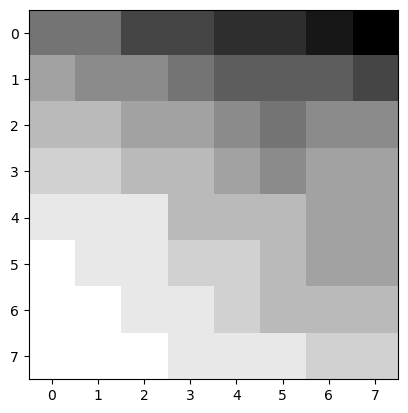

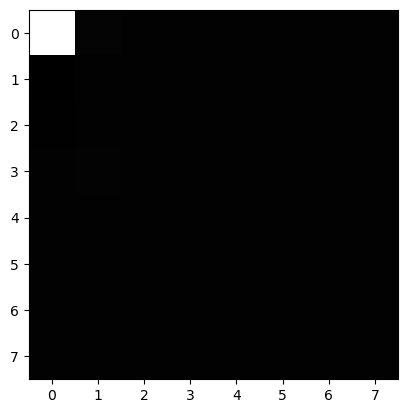

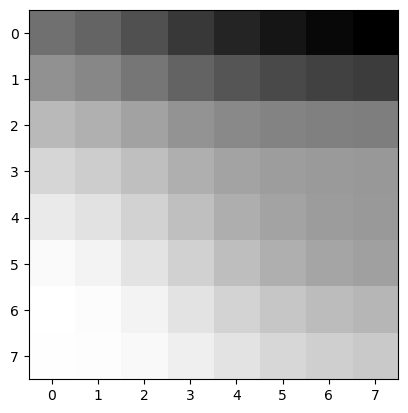

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sp

#import image
img=cv2.imread('Images/T1.jpeg')
img=np.array(img)
height,width,depth=img.shape
img_gray=np.zeros((height,width),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        img_gray[i,j]=(int(img[i,j,0])+int(img[i,j,1])+int(img[i,j,2]))/3
img_dct=img_gray[20:28,50:58]
plt.imshow(img_dct,cmap='gray')
plt.show()

#perform 2D-DCT
def alpha(u,N):
    if u==0: return 1/np.sqrt(N)
    elif u>0: return np.sqrt(2/N)
    else: return 0

def f_dct(img):
    height,width=img.shape[:2]
    N=height
    img_aft_dct=np.zeros((height,width))
    for u in range(height):
        for v in range(width):
            sum=0
            for i in range(height):
                for j in range(width):
                    sum+=float(img[i,j])*np.cos(((2*i+1)*u*np.pi)/(2*N))*np.cos(((2*j+1)*v*np.pi)/(2*N))
            img_aft_dct[u,v]=alpha(u,N)*alpha(v,N)*sum
    return img_aft_dct

img_aft_dct=f_dct(img_dct)
# print("With Formular:\n")
# print(img_aft_dct)
# img_after_dct_sp = sp.dct(sp.dct(img_dct.T, norm='ortho').T, norm='ortho')
# print("With scipy:\n")
# print(img_after_dct_sp)
plt.imshow(img_aft_dct,cmap='gray')
plt.show()
#filter
for i in range(8):
    for j in range(8):
        if i+j>=5:
            img_aft_dct[i,j]=0
img_recover=sp.idct(sp.idct(img_aft_dct.T, norm='ortho').T, norm='ortho')
plt.imshow(img_recover,cmap='gray')
plt.show()

## II. DCT Matrix
DCT Matrix T(u,i) =
$
\begin{cases}
\ \sqrt{\frac{1}{N}},&u=0\\
\ \sqrt{\frac{2}{N}}cos(\frac{(2i+1)u\pi}{2N}),&u>0\\
\end{cases}
$. 

Therefore, $F=T \cdot f \cdot T^T$, f(i,j) is pixels of image

## III. Inverse DCT
Due to the DCT Matrix is orthogenal matrix, which means $T^{-1}=T^T$,  

Therefore, $f=T^{-1}\cdot F\cdot T$

[[198 198 196 196 195 195 194 193]
 [200 199 199 198 197 197 197 196]
 [201 201 200 200 199 198 199 199]
 [202 202 201 201 200 199 200 200]
 [203 203 203 201 201 201 200 200]
 [204 203 203 202 202 201 200 200]
 [204 204 203 203 202 201 201 201]
 [204 204 204 203 203 203 202 202]]


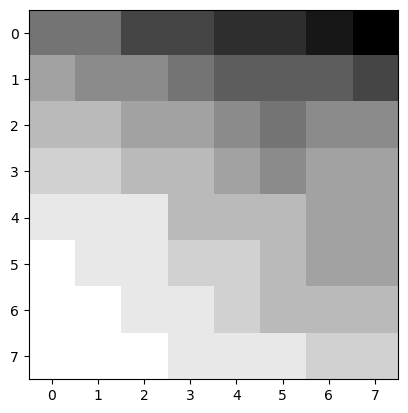

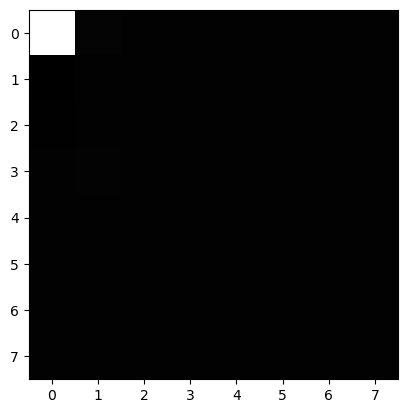

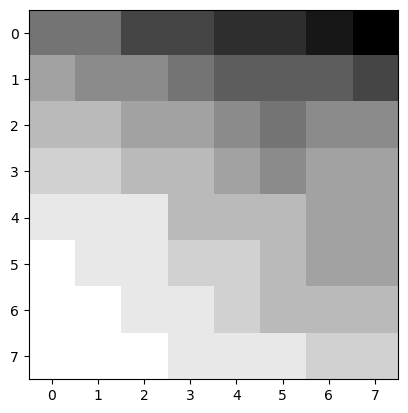

In [50]:
print(img_dct)
plt.imshow(img_dct,cmap='gray')
plt.show()
N=8
T=np.zeros((N,N))
for u in range(8):
    for i in range(8):
        T[u,i]=np.sqrt(2/N)*np.cos(((2*i+1)*u*np.pi)/(2*N))
T[0,:]=1/np.sqrt(N)
img_dct_m=T.dot(img_dct).dot(T.T)
plt.imshow(img_dct_m,cmap='gray')
plt.show()
#proove T is orthogonal matrix  
plt.imshow((T.T).dot(img_dct_m).dot(T),cmap='gray')
plt.show()